In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

data = pd.read_csv("backbone_performance.csv")

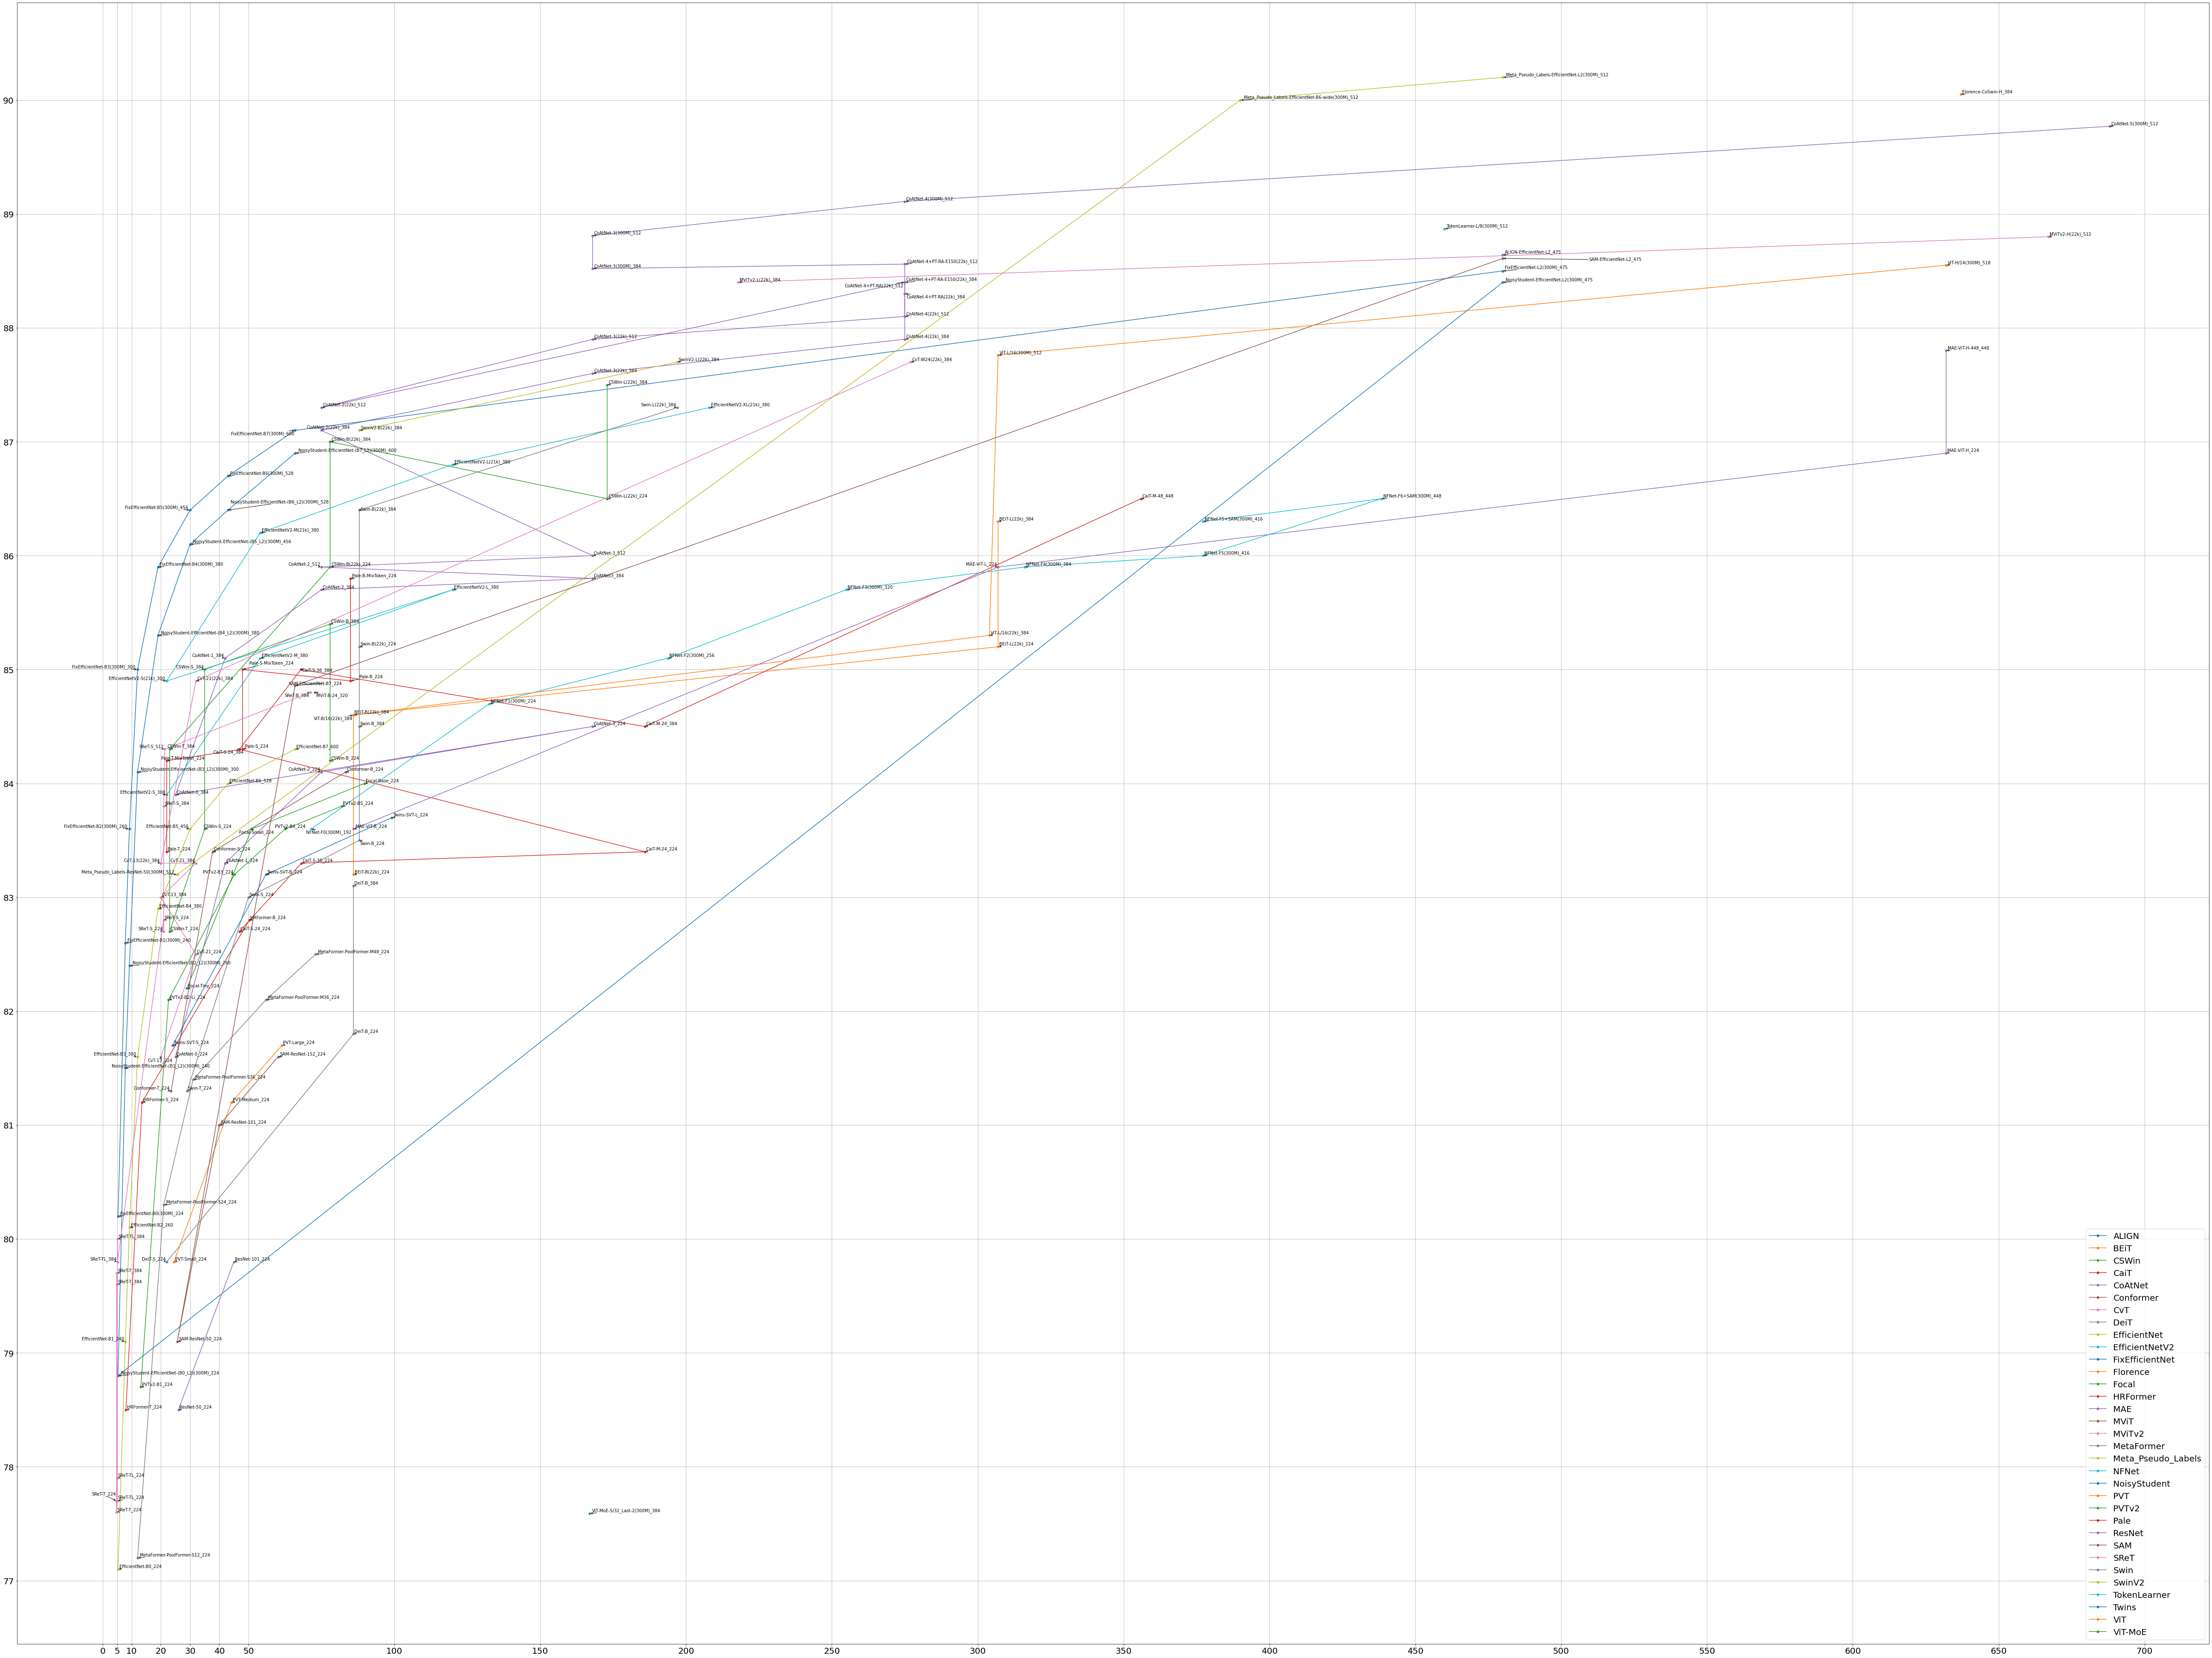

In [5]:
# sort_values = "FLOPs(B)"
sort_values = "Params(M)"
x_max = 700
grid = 50

df = data[data[sort_values]>0]
df = df[df[sort_values]<x_max]
# df = data[data["TrainSet"]!="ImageNet-1K+JFT-3B"]

groups = df.groupby("Method")
fig, ax = plt.subplots(figsize=(72.0, 54.0))
ax.margins(0.05)
xticks_list = [i*grid for i in range(x_max//grid+1)]
xticks_list.extend([5, 10, 20, 30, 40])  # Params: 5~40
plt.xticks(sorted(xticks_list))
plt.yticks([i for i in range(int(df["Acc"].min()), int(df["Acc"].max())+1)])
plt.grid()
texts = []
for name, group in groups:
    group_max_idx = group.groupby(['Model'])['Acc'].transform(max) == group['Acc']
    group_t = group[group_max_idx]
    group_t = group_t.sort_values(sort_values)
    # group_t = group
    ax.plot(group_t[sort_values], group_t["Acc"], marker='o', linestyle='-', ms=5, label=name)
    for k, v in group_t.iterrows():
        texts.append(ax.text(v[sort_values], v['Acc'], v['Model']+"_"+str(v['Size'])))
        # ax.annotate(v['Model']+"_"+str(v['Size']), [v[sort_values], v['Acc']],
        #             xytext=(-10,5), textcoords='offset points',
        #             family='sans-serif', fontsize=15, color='darkslategrey')
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))
fig.tight_layout()
plt.legend(fontsize=20,loc='lower right')
plt.tick_params(labelsize=20)
plt.show()